## Suur maalritöö


Antud projekt sünnis on süüdi suur vaimustus DALL-E2 tehisintellekti vastu. 

https://openai.com/dall-e-2/

Sellest tingituna tekkis soov ise esimest korda katsetada tehisnärvivõrkudel baseeruvaid mudeleid ja nende abil pilditöötlust proovida. Käesolevas projektis kasutan juba valmiskujul mudelit, mis pärineb Tensorflow keskkonnast, mille põhjal on eesmärgiks taasluua mõni enda foto mõne kuulsa maalikunstniku "stiilis". 

In [4]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

Valmiskujul mudeli allalaadimine.

In [5]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

Selleks, et pilte paremini töödelda, on vaja neid eelnevalt standardiseerida ja mudelile loetavamaks teha.

In [6]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

Loodud funktsiooni kasutades saab nüüd sisse lugeda töödeldava foto (content_image) ja töötluse aluseks oleva pildi (style_image).

In [7]:
content_image = load_image('cat.jpg')
style_image = load_image('rothko.jpg')

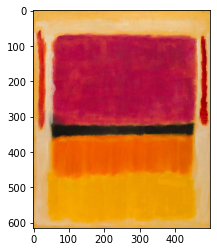

In [8]:
plt.imshow(np.squeeze(style_image))
plt.show()

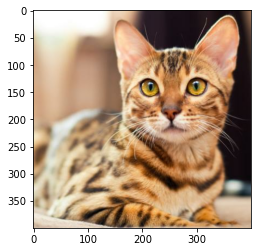

In [9]:
plt.imshow(np.squeeze(content_image))
plt.show()

Rakendame lõpuks mudelit, mis peaks tootma stiliseeritud sisuga uue pildi.

In [10]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

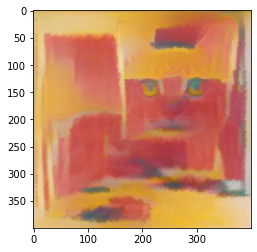

In [11]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

Saime lõpptulemusena ettekujutuse sellest, millisena oleks võinud kõrgelt hinnatud abstraktsionist Mark Rothko maalida kassi, juhul kui tal oleks olnud kass ning mingil põhjusel ka tahtmine teda endale omases abstraktses stiilis kujutada. Mudelisse saab sisestada ükskõik milliseid endale meeldivaid pilte, mis ei ole liialt suure resolutsiooniga. Lõbusat katsetamist jätkub küllaga!

Pildi salvestamisel peame taastama eelnevalt töötlusfunktsiooniga tehtud sammud. 

In [12]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True